In [2]:
pip install torch torchvision diffusers transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
clean_up_tokenization_spaces=False


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [6]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [10]:
import torch
from diffusers import StableDiffusionPipeline

# Check if CUDA is available for GPU support
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pre-trained Stable Diffusion model with appropriate precision
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe = pipe.to(device)

# Function to generate an image from a text prompt
def generate_image(prompt: str, num_inference_steps: int = 50):
    """
    Generates an image from a given text prompt using the Stable Diffusion model.

    Args:
        prompt (str): The text description to generate the image.
        num_inference_steps (int): The number of inference steps (higher means better quality but slower).

    Returns:
        PIL Image: The generated image.
    """
    with torch.no_grad():
        image = pipe(prompt, num_inference_steps=num_inference_steps, clean_up_tokenization_spaces=False).images[0]
    return image

# Example usage
prompt = "A beautiful sunset over a mountain range with blue and orange hues in the sky."
generated_image = generate_image(prompt)
generated_image.save("generated_image.png")  # Save the image to a file




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

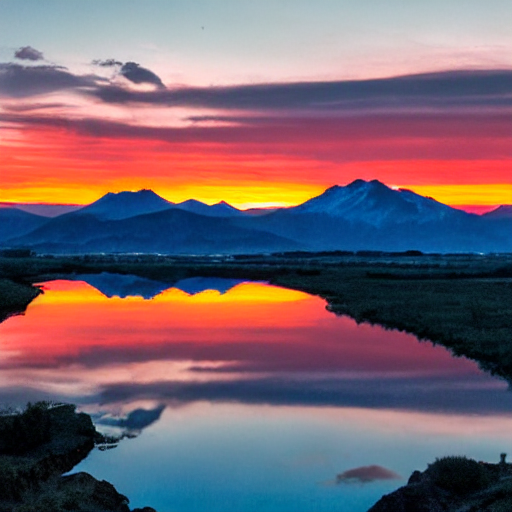

In [11]:
from IPython.display import display

display(generated_image)  # Display the image inline in the notebook
